# Imports

In [17]:
%load_ext autoreload
%autoreload 2

# og python libs
import re
import os
import pprint
import itertools
from typing import Tuple, List, Dict, Pattern, Any


# classic DS libs
import pandas as pd
import numpy as np

# viz libs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from ipywidgets import interact, fixed, interact_manual

# scipy
from scipy.integrate import quad
from scipy.signal import find_peaks, peak_widths, find_peaks_cwt
from scipy.constants import k as k_B
from scipy.constants import c, pi, N_A, h, hbar, m_e, m_p

# lmfit things
from lmfit.models import LinearModel, GaussianModel, VoigtModel, SplineModel, ExponentialModel, ExpressionModel, Model, ConstantModel
from lmfit import Parameter, Parameters
from lmfit import minimize, minimizer

# ML
from sklearn.linear_model import LinearRegression

# GenAI
from google import genai
from google.genai import types

# natural data databases
import hapi
DB_PATH = 'hapi_data'
hapi.db_begin(DB_PATH)

# API setups
G_MODEL_ID = "gemini-2.5-flash-preview-05-20"
G_API_KEY = os.environ.get("GEMINI_API_KEY")
G_CLIENT = genai.Client(api_key=G_API_KEY)

response = G_CLIENT.models.generate_content(
    model=G_MODEL_ID,
    contents="test",
)

print(response.text)

pp = pprint.PrettyPrinter(depth=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using hapi_data

Hello! I'm here and ready to chat. How can I help you today?


In [18]:
# custom
import sys
sys.path.append('../../../../../')
from my_utils import defs as cp
from my_utils.classes import CEPAS_measurement, CEPAS_benchmark, CEPAS_noise_info, CEPAS_SNR_bench
cp.hello_test()

Hello!


# Benchmark

In [19]:
pressure_list = [900]
freq_list_2 = [20, 30, 40, 80, 90, 130, 170, 220, 300]

benchmark_path_2 = "./"
benchmark_noise_2 = "./noise-tests/"

patterns = cp.create_regex_strings(pressure_list, freq_list_2, f="open")

test_bench_files = cp.dir_match_dict(benchmark_path_2, patterns) 
# pp.pprint(patterns)
pp.pprint(test_bench_files)

{900: {20: ['open_900_32_20__msr__0',
            'open_900_32_20__msr__1',
            'open_900_32_20__msr__2'],
       30: ['open_900_32_30__msr__3',
            'open_900_32_30__msr__4',
            'open_900_32_30__msr__5'],
       40: ['open_900_32_40__msr__6',
            'open_900_32_40__msr__7',
            'open_900_32_40__msr__8'],
       80: ['open_900_32_80__msr__10',
            'open_900_32_80__msr__11',
            'open_900_32_80__msr__9'],
       90: ['open_900_32_90__msr__12',
            'open_900_32_90__msr__13',
            'open_900_32_90__msr__14'],
       130: ['open_900_32_130__msr__15',
             'open_900_32_130__msr__16',
             'open_900_32_130__msr__17'],
       170: ['open_900_32_170__msr__18',
             'open_900_32_170__msr__19',
             'open_900_32_170__msr__20'],
       220: ['open_900_32_220__msr__21',
             'open_900_32_220__msr__22',
             'open_900_32_220__msr__23'],
       300: ['open_900_32_300__msr__24',
       

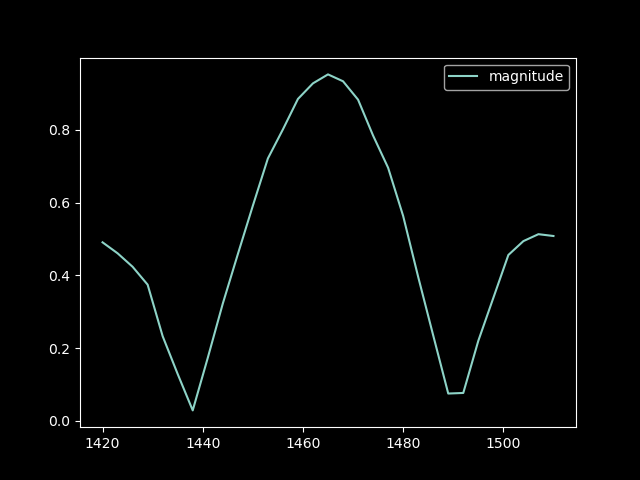

,time,offset1,P1,H3,H2,P_las,T_las,RH,Pressure,time_subtracted,H2_pnorm,H3_pnorm,wavenumbers,magnitude_pnorm
1,3185.881,1420.0,0.0,-0.000657,-0.032960,0.061752,403.5192,35.79102,299.0,0.000,-0.512984,-0.010224,6983.810507,0.513086
2,3187.683,1423.0,0.0,-0.001141,-0.032579,0.061752,403.5192,35.79102,299.0,1.802,-0.507055,-0.017763,6983.797414,0.507366
3,3189.490,1426.0,0.0,-0.001634,-0.029614,0.061752,403.5192,35.76660,299.0,3.609,-0.460912,-0.025435,6983.784322,0.461613
4,3191.299,1429.0,0.0,-0.001097,-0.025896,0.061752,403.5192,35.76660,299.0,5.418,-0.403041,-0.017068,6983.771230,0.403402
5,3193.107,1432.0,0.0,-0.000792,-0.018650,0.070772,393.6961,35.76660,299.0,7.226,-0.254533,-0.010811,6983.758137,0.254762


In [28]:
u1 = [1158.1, 1452.7]
u2 = [6984.9534710, 6983.6678]

# REMINDER frequencies: [20, 30, 40, 80, 90, 130, 170, 220, 300]
p = 900
f = 30
bench_test_2 = CEPAS_benchmark(benchmark_path_2, test_bench_files, p, f, file_signature="open")
# bench_test.self_test()
bench_test_2.add_wav(u1, u2)
bench_test_2.add_magnitude()
test_avg = bench_test_2.get_avg()
target_peak = (1400, 1550)
bench_peaks = find_peaks_cwt(test_avg['H2_pnorm'], 10.0)
# print(bench_peaks)
# print(test_300_20)
%matplotlib widget

plt.close()
plt.figure()
# 1st test
# plt.plot(bench_test_2.spectra.spectra_list[0]['offset1'], bench_test_2.spectra.spectra_list[0]['H2_pnorm'])
# plt.plot(bench_test_2.spectra.spectra_list[1]['offset1'], bench_test_2.spectra.spectra_list[1]['H2_pnorm'])
# plt.plot(bench_test_2.spectra.spectra_list[2]['offset1'], bench_test_2.spectra.spectra_list[2]['H2_pnorm'])
# plt.plot(test_avg['offset1'][bench_peaks], test_avg['H2_pnorm'][bench_peaks], 'rx')
# plt.plot(test_avg['offset1'], test_avg['H2_pnorm'], label='avg')

# test magnitude
plt.plot(test_avg['offset1'], test_avg["magnitude_pnorm"], label="magnitude")

plt.legend()
# plt.xlim(1625, 1750)
# plt.ylim(-0.008, -0.0015)
plt.show()
bench_test_2.spectra.spectra_list[0].head()

# Signal

Uncomment below to see all the peaks used for bench

50    1.377071
Name: magnitude_pnorm, dtype: float64


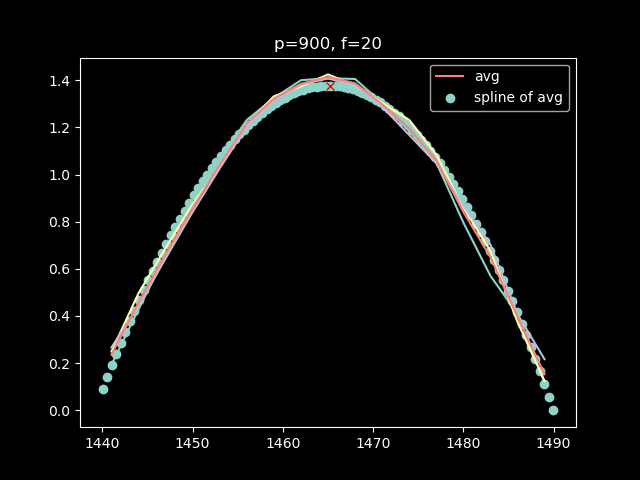

49    0.924385
Name: magnitude_pnorm, dtype: float64


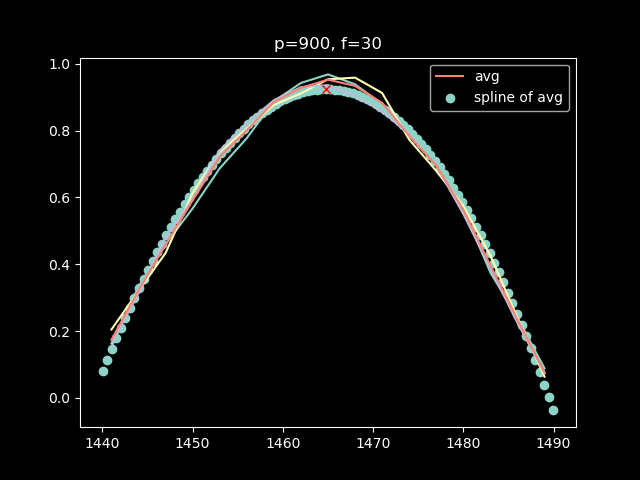

49    0.694186
Name: magnitude_pnorm, dtype: float64


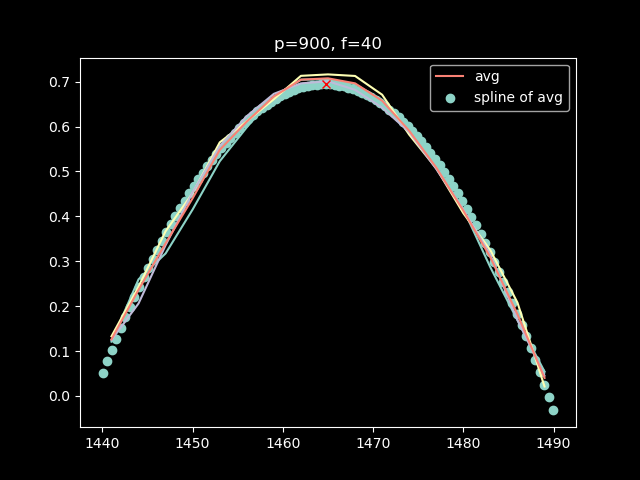

48    0.368712
Name: magnitude_pnorm, dtype: float64


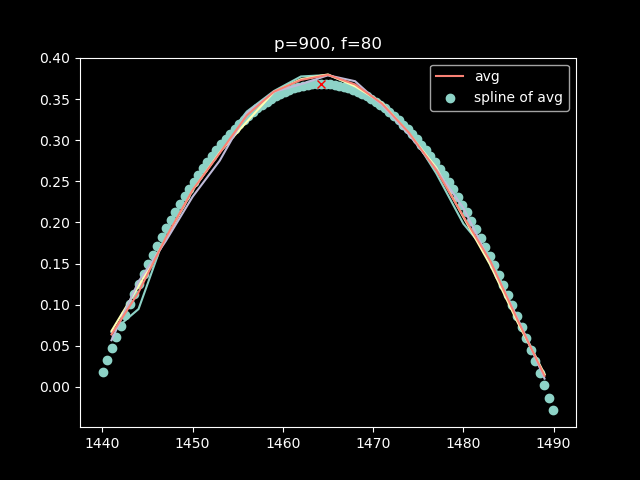

48    0.330633
Name: magnitude_pnorm, dtype: float64


/tmp/ipykernel_4141/2292905881.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


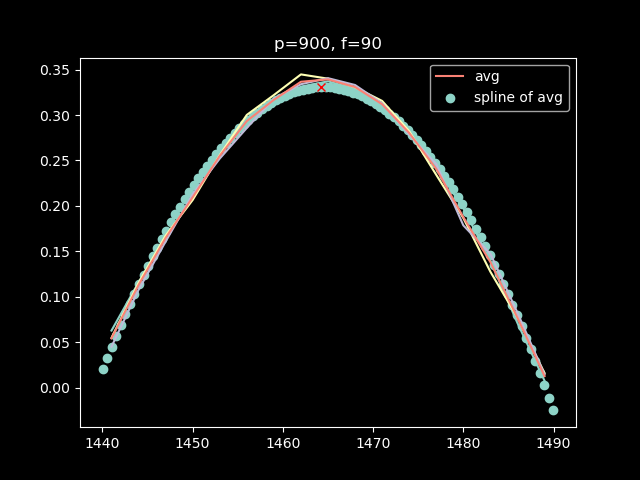

48    0.254296
Name: magnitude_pnorm, dtype: float64


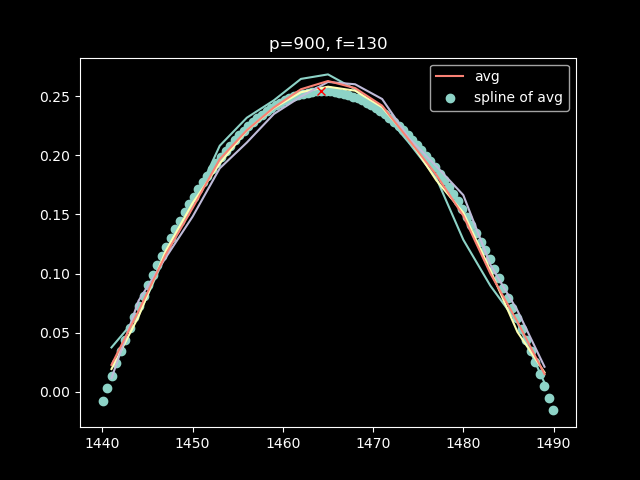

49    0.232342
Name: magnitude_pnorm, dtype: float64


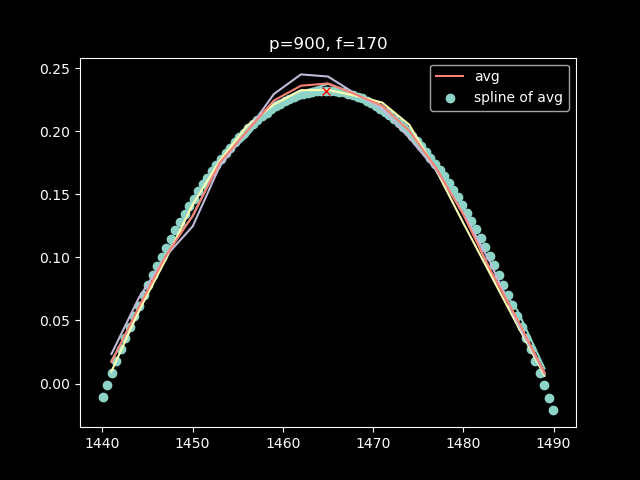

48    0.280744
Name: magnitude_pnorm, dtype: float64


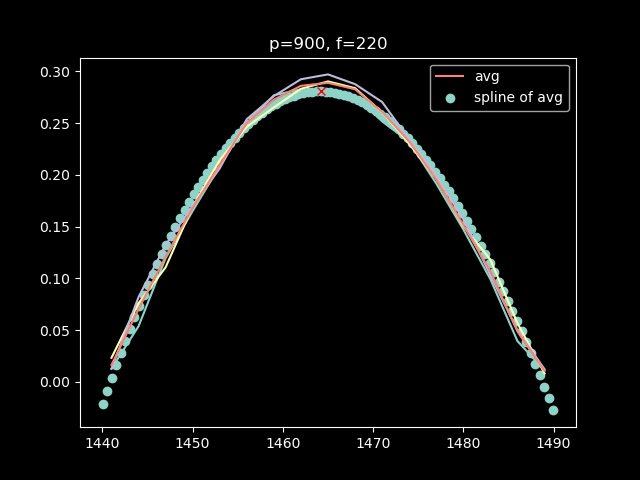

49    0.438872
Name: magnitude_pnorm, dtype: float64


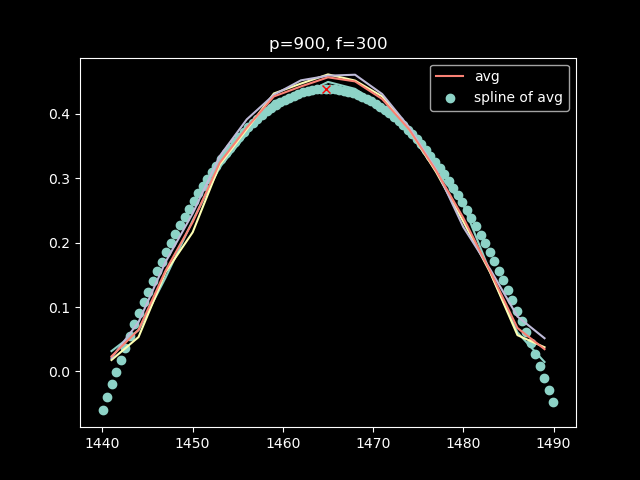

In [29]:
plt.close()
ps = [900]
fs = [20, 30, 40, 80, 90, 130, 170, 220, 300]
for p, f in itertools.product(ps, fs):
    bench_test = CEPAS_benchmark(benchmark_path_2, test_bench_files, p, f, file_signature="open")
    bench_test.add_magnitude()
    peak_start = 1440  # 1449
    peak_end = 1490  # 1471
    peak = bench_test.get_window(peak_start, peak_end)
    peak_spline = bench_test.get_spline_of_window(n_spectrum=-1,
                                                  n_knots=4,
                                                  colx="offset1",
                                                  coly="magnitude_pnorm",
                                                  start=peak_start,
                                                  end=peak_end)
    # print(peak_spline[1])
    print(peak_spline[-1])
    plt.figure()
    plt.plot(peak[0]['offset1'], peak[0]['magnitude_pnorm'])
    plt.plot(peak[1]['offset1'], peak[1]["magnitude_pnorm"])
    plt.plot(peak[2]['offset1'], peak[2]["magnitude_pnorm"])
    plt.plot(peak[3]['offset1'], peak[3]['magnitude_pnorm'], label='avg')
    plt.scatter(peak_spline[2]['offset1'], peak_spline[2]['magnitude_pnorm'], label='spline of avg')
    plt.plot(peak_spline[-2]['offset1'], peak_spline[-2]['magnitude_pnorm'], 'rx')
    plt.legend()
    plt.title(f"p={p}, f={f}")
    plt.show()

# Noise

5.289e-05


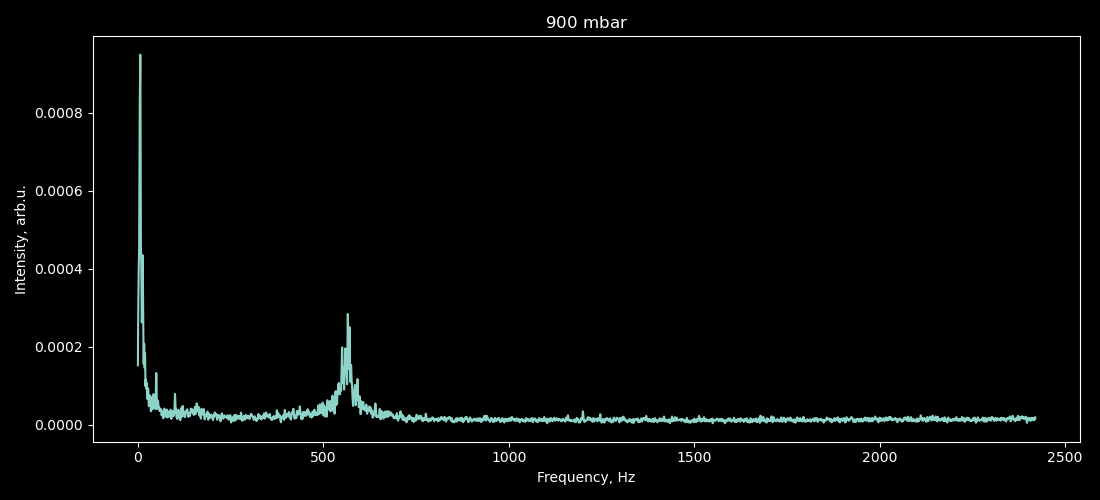

In [32]:
# bench_noise_300_2 = CEPAS_noise_info(benchmark_noise_2, 300)
# bench_noise_600_2 = CEPAS_noise_info(benchmark_noise_2, 600)
bench_noise_900_2 = CEPAS_noise_info(benchmark_noise_2)

backgrounds = {900: bench_noise_900_2}
            #    600: bench_noise_600_2,
            #    900: bench_noise_900_2}


print(f"{np.format_float_scientific(bench_noise_900_2.get_noise_at(f), precision=3)}")
plt.close()
plt.figure(figsize=(11, 5))
# plt.subplot(131)
# plt.title("$300\\ \\text{mbar}$")
# plt.xlabel('Frequency, Hz')
# plt.ylabel('Intensity, arb.u.')
# plt.plot(bench_noise_300_2.spectrum['freq'], bench_noise_300_2.spectrum['intensity'])
# plt.subplot(132)
# plt.title("$600\\ \\text{mbar}$")
# plt.xlabel('Frequency, Hz')
# plt.ylabel('Intensity, arb.u.')
# plt.plot(bench_noise_600_2.spectrum['freq'], bench_noise_600_2.spectrum['intensity'])
plt.subplot(111)
plt.title("$900\\ \\text{mbar}$")
plt.xlabel('Frequency, Hz')
plt.ylabel('Intensity, arb.u.')
plt.plot(bench_noise_900_2.spectrum['freq'], bench_noise_900_2.spectrum['intensity'])
plt.tight_layout()
plt.show()

In [33]:
noise_start_2 = 1625
noise_end_2 = 1749
peak_start_2 = 1440
peak_end_2 = 1490

bench_final_2 = CEPAS_SNR_bench(test_bench_files,
                                bench_path=benchmark_path_2,
                                noise_path=benchmark_noise_2,
                                file_sig="open")

get_all = bench_final_2.get_mag_snrs(peak_start_2,
                                     peak_end_2,
                                     n_knots=4,
                                     skip_single=True)

snrs = get_all[0]
noises = get_all[1]  # single, background
signals = get_all[2]

signals.index
bench_final_2

'magnitude_pnorm'
, but now added the missing column
Replaced pressure in clean noise file                           name with empty string, list index out of range
DEBUG: At p=900                         and f=20 signal is 
---->50    1.377071
Name: magnitude_pnorm, dtype: float64<----

!No single point measurements this time!
'magnitude_pnorm'
, but now added the missing column
Replaced pressure in clean noise file                           name with empty string, list index out of range
DEBUG: At p=900                         and f=30 signal is 
---->49    0.924385
Name: magnitude_pnorm, dtype: float64<----

!No single point measurements this time!
'magnitude_pnorm'
, but now added the missing column
Replaced pressure in clean noise file                           name with empty string, list index out of range
DEBUG: At p=900                         and f=40 signal is 
---->49    0.694186
Name: magnitude_pnorm, dtype: float64<----

!No single point measurements this time!
'magnitude

In [24]:
noises

,900
40,[5.652174444444445e-05]
60,[3.860611111111112e-05]
80,[2.9402329629629633e-05]
160,[4.428839629629631e-05]
180,[2.3361333333333333e-05]
260,[1.9870174999999996e-05]
340,[2.312159259259259e-05]
440,[2.244202592592592e-05]
600,[5.289181851851852e-05]


/tmp/ipykernel_4141/250908516.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'signal': [float(signals[900][f][0]) for f in snrs.index],
/tmp/ipykernel_4141/250908516.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)


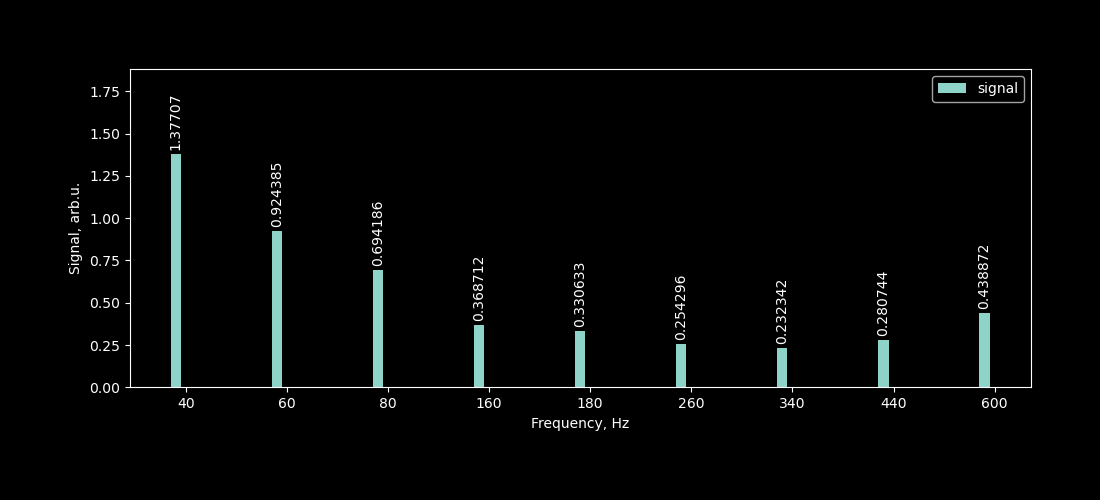

In [34]:
# signals300 = {
#     'signal': [float(signals[300][f][0]) for f in signals.index],
#     # 'background': [float(signals[300][f][1]) for f in signals.index]
# }

# signals600 = {
#     'signal': [float(signals[600][f][0]) for f in signals.index],
#     # 'background': [float(signals[600][f][1]) for f in signals.index]
# }

signals900 = {
    'signal': [float(signals[900][f][0]) for f in snrs.index],
    # 'background': [float(signals[900][f][1]) for f in snrs.index]
}

frequencies = snrs.index
x = np.arange(len(frequencies))
width = 0.1
multiplier = 0
spacing = 0.05
top_align = 1.3

plt.close()
plt.figure(figsize=(11, 5), constrained_layout=True)

# ax1 = plt.subplot(311)
# for k, v in signals300.items():
#     offset = (width+spacing) * multiplier
#     rects = ax1.bar(x+offset, v, width, label=k)
#     ax1.bar_label(rects, rotation=90, padding=3)
#     multiplier += 1
# ax1.set_xticks(x+width, np.round(list(frequencies), 2))
# ax1.set_xlabel('Frequency, Hz')
# ax1.set_ylabel('Signal, arb.u.')
# old_top = ax1.get_ylim()[1]
# new_top = old_top*top_align
# ax1.set_ylim(top=new_top)
# ax1.legend()
# multiplier = 0

# ax2 = plt.subplot(312)
# for k, v in signals600.items():
#     offset = (width+spacing) * multiplier
#     rects = ax2.bar(x+offset, v, width, label=k)
#     ax2.bar_label(rects, rotation=90, padding=3)
#     multiplier += 1
# ax2.set_xticks(x+width, np.round(list(frequencies), 2))
# ax2.set_xlabel('Frequency, Hz')
# ax2.set_ylabel('Signal, arb.u.')
# old_top = ax2.get_ylim()[1]
# new_top = old_top*top_align
# ax2.set_ylim(top=new_top)
# ax2.legend()
# multiplier = 0

ax3 = plt.subplot(111)
for k, v in signals900.items():
    offset = (width+spacing) * multiplier
    rects = ax3.bar(x+offset, v, width, label=k)
    ax3.bar_label(rects, rotation=90, padding=3)
    multiplier += 1
ax3.set_xticks(x+width, np.round(list(frequencies), 2))
ax3.set_xlabel('Frequency, Hz')
ax3.set_ylabel('Signal, arb.u.')
old_top = ax3.get_ylim()[1]
new_top = old_top*top_align
ax3.set_ylim(top=new_top)
ax3.legend()

plt.tight_layout(pad=5)
plt.show()

/tmp/ipykernel_4141/3210707154.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)


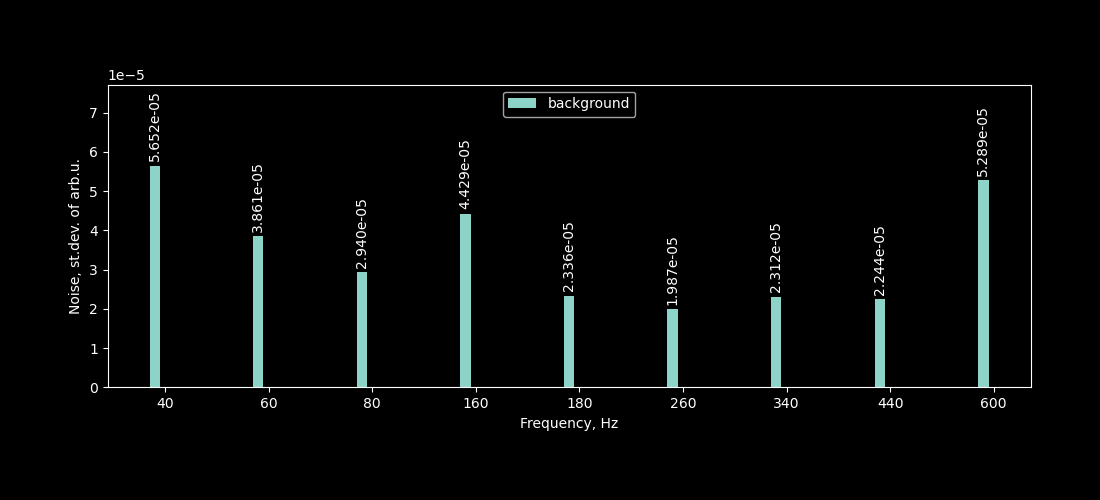

In [36]:
# noises300 = {
#     'single': [noises[300][f][0] for f in noises.index],
#     'background': [noises[300][f][1] for f in noises.index]
# }

# noises600 = {
#     'single': [noises[600][f][0] for f in noises.index],
#     'background': [noises[600][f][1] for f in noises.index]
# }

noises900 = {
    # 'single': [noises[900][f][0] for f in noises.index],
    'background': [noises[900][f][0] for f in noises.index]
}

frequencies = noises.index
x = np.arange(len(frequencies))
width = 0.1
multiplier = 0
spacing = 0.05
top_align = 1.3

plt.close()
plt.figure(figsize=(11, 5), constrained_layout=True)

# ax1 = plt.subplot(311)
# for k, v in noises300.items():
#     offset = (width+spacing) * multiplier
#     rects = ax1.bar(x+offset, v, width, label=k)
#     ax1.bar_label(rects, rotation=90, padding=3, fmt="%.3e")
#     multiplier += 1
# ax1.set_xticks(x+width, np.round(list(frequencies), 2))
# ax1.set_xlabel('Frequency, Hz')
# ax1.set_ylabel('Noise, st.dev. of arb.u.')
# old_top = ax1.get_ylim()[1]
# new_top = old_top*top_align
# ax1.set_ylim(top=new_top)
# ax1.legend()
# multiplier = 0

# ax2 = plt.subplot(312)
# for k, v in noises600.items():
#     offset = (width+spacing) * multiplier
#     rects = ax2.bar(x+offset, v, width, label=k)
#     ax2.bar_label(rects, rotation=90, padding=3, fmt="%.3e")
#     multiplier += 1
# ax2.set_xticks(x+width, np.round(list(frequencies), 2))
# ax2.set_xlabel('Frequency, Hz')
# ax2.set_ylabel('Noise, st.dev. of arb.u.')
# old_top = ax2.get_ylim()[1]
# new_top = old_top*top_align
# ax2.set_ylim(top=new_top)
# ax2.legend()
# multiplier = 0

ax3 = plt.subplot(111)
for k, v in noises900.items():
    offset = (width+spacing) * multiplier
    rects = ax3.bar(x+offset, v, width, label=k)
    ax3.bar_label(rects, rotation=90, padding=3, fmt="%.3e")
    multiplier += 1
ax3.set_xticks(x+width, np.round(list(frequencies), 2))
ax3.set_xlabel('Frequency, Hz')
ax3.set_ylabel('Noise, st.dev. of arb.u.')
old_top = ax3.get_ylim()[1]
new_top = old_top*top_align
ax3.set_ylim(top=new_top)
ax3.legend()

plt.tight_layout(pad=5)
plt.show()

/tmp/ipykernel_4141/901759254.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)


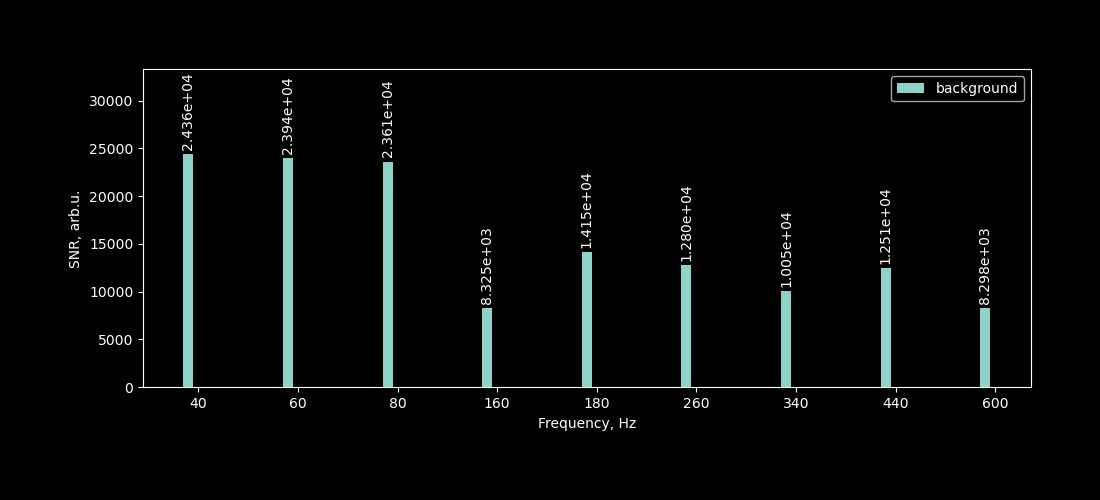

In [37]:
# snrs300 = {
#     'single': [snrs[300][f][0] for f in snrs.index],
#     'background': [snrs[300][f][1] for f in snrs.index]
# }

# snrs600 = {
#     'single': [snrs[600][f][0] for f in snrs.index],
#     'background': [snrs[600][f][1] for f in snrs.index]
# }

snrs900 = {
    # 'single': [snrs[900][f][0] for f in snrs.index],
    'background': [snrs[900][f][0] for f in snrs.index]
}

frequencies = snrs.index
x = np.arange(len(frequencies))
width = 0.1
multiplier = 0
spacing = 0.05
top_align = 1.3

plt.close()
plt.figure(figsize=(11, 5), constrained_layout=True)

# ax1 = plt.subplot(311)
# for k, v in snrs300.items():
#     offset = (width+spacing) * multiplier
#     rects = ax1.bar(x+offset, v, width, label=k)
#     ax1.bar_label(rects, rotation=90, padding=3, fmt="%.3e")
#     multiplier += 1
# ax1.set_xticks(x+width, np.round(list(frequencies), 2))
# ax1.set_xlabel('Frequency, Hz')
# ax1.set_ylabel('SNR, arb.u.')
# old_top = ax1.get_ylim()[1]
# new_top = old_top*top_align
# ax1.set_ylim(top=new_top)
# ax1.legend()
multiplier = 0

# ax2 = plt.subplot(312)
# for k, v in snrs600.items():
#     offset = (width+spacing) * multiplier
#     rects = ax2.bar(x+offset, v, width, label=k)
#     ax2.bar_label(rects, rotation=90, padding=3, fmt="%.3e")
#     multiplier += 1
# ax2.set_xticks(x+width, np.round(list(frequencies), 2))
# ax2.set_xlabel('Frequency, Hz')
# ax2.set_ylabel('SNR, arb.u.')
# old_top = ax2.get_ylim()[1]
# new_top = old_top*top_align
# ax2.set_ylim(top=new_top)
# ax2.legend()
multiplier = 0

ax3 = plt.subplot(111)
for k, v in snrs900.items():
    offset = (width+spacing) * multiplier
    rects = ax3.bar(x+offset, v, width, label=k)
    ax3.bar_label(rects, rotation=90, padding=3, fmt="%.3e")
    multiplier += 1
ax3.set_xticks(x+width, np.round(list(frequencies), 2))
ax3.set_xlabel('Frequency, Hz')
ax3.set_ylabel('SNR, arb.u.')
old_top = ax3.get_ylim()[1]
new_top = old_top*top_align
ax3.set_ylim(top=new_top)
ax3.legend()

plt.tight_layout(pad=5)
plt.show()